# 📊 Netflix Dataset — Load & Quick EDA

This notebook loads the Netflix dataset from Kaggle, performs a quick exploratory data analysis (EDA) and saves a clean version for later phases of the project.

---

## 🔖 Table of Contents

1. [Imports and Settings](#cell-1--imports-and-settings)  
2. [Load Dataset and Quick Overview](#cell-2--load-dataset-and-quick-overview)  
3. [Data Types, Nulls and Duplicates](#cell-3--data-types-nulls-and-duplicates)  
4. [Quick Statistics and Counts](#cell-4--quick-statistics-and-counts)  
5. [Basic Cleaning and New Columns](#cell-5--basic-cleaning-and-new-columns)  
6. [Save Processed Data](#cell-6--save-processed-data)  
7. [Quick Plot (Sanity Check)](#cell-7--quick-plot-sanity-check)  

---

## ✅ Objective
- Understand the dataset structure.  
- Detect basic data quality issues (nulls, duplicates).  
- Create a clean dataset ready for more advanced analysis.  
- Save intermediate results and a first visualization.

## Cell 1 — Imports and Settings  
This cell imports key libraries (pandas, numpy, matplotlib, seaborn) and configures visualization options.  
It also creates `data/processed` and `figures` folders if they don't exist yet, to save future results.

In [10]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 80)
pd.set_option('display.width', 120)
sns.set_theme(style="whitegrid")

os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../figures', exist_ok=True)

## Cell 2 — Load Dataset and Quick Overview  
Here we load the original CSV from Kaggle (`netflix_titles.csv`).  
We normalize column names (lowercase and with underscores).  
We display the number of rows/columns, available columns, and first few rows to get an idea of the content.

In [11]:
csv_path = '../data/netflix_titles.csv'
df = pd.read_csv(csv_path)

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("Shape:", df.shape)
print("Columns:", df.columns.to_list())
df.head(6)

Shape: (8807, 12)
Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


## Cell 3 — Data Types, Nulls and Duplicates  
We display data types, count of null values per column and number of basic duplicates (by title, year and type).  
This helps us detect data quality issues.

In [12]:
display(df.info())
print("\nNulls per column (top 20):")
print(df.isnull().sum().sort_values(ascending=False).head(20))

dupes = df.duplicated(subset=['title','release_year','type']).sum()
print(f"\nDuplicates detected (title, release_year, type): {dupes}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


None


Nulls per column (top 20):
director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

Duplicates detected (title, release_year, type): 0


## Cell 4 — Quick Statistics and Counts  
We display descriptive statistics and quick counts of `type` (Movies vs TV Shows) and `rating` (if exists).  
This gives us an initial overview of category distribution and numerical data.

In [13]:
display(df.describe(include='all').T)

print("\nMovies vs TV Shows:")
print(df['type'].value_counts(dropna=False))

if 'rating' in df.columns:
	print("\nRating (top):")
	print(df['rating'].value_counts(dropna=False).head(15))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Movies vs TV Shows:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Rating (top):
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
NC-17          3
UR             3
Name: count, dtype: int64


## Cell 5 — Basic Cleaning and New Columns  
We create a working copy (`dfw`) and clean the data:  
- Normalize text (remove spaces, convert empty strings to NaN).  
- Convert dates and years to appropriate data types.  
- Parse `duration` to extract minutes or seasons.  
- Create `duration_minutes` and `seasons` columns.  
- "Explode" genres (`listed_in`) into a new dataframe `df_genres` (1 row per title × genre).  
- Remove basic duplicates.

In [14]:
dfw = df.copy()

text_cols = ['title','director','cast','country','rating','description','listed_in']
for c in text_cols:
    if c in dfw.columns:
        dfw[c] = dfw[c].fillna('').astype(str).str.strip()
        dfw[c] = dfw[c].replace({'': np.nan})

dfw['date_added'] = pd.to_datetime(dfw['date_added'], errors='coerce')
dfw['release_year'] = pd.to_numeric(dfw['release_year'], errors='coerce')

dfw['duration_num'] = pd.to_numeric(dfw['duration'].str.extract(r'(\d+)')[0], errors='coerce')
dfw['duration_unit'] = dfw['duration'].str.replace(r'\d+\s*', '', regex=True).str.strip().str.lower().replace({
    'seasons':'season','season':'season','seasons':'season','min':'min','mins':'min','':'unknown'
})

dfw['type'] = dfw['type'].str.strip()

dfw['duration_minutes'] = np.where(dfw['duration_unit']=='min', dfw['duration_num'], np.nan)
dfw['seasons'] = np.where(dfw['duration_unit']=='season', dfw['duration_num'], np.nan)

dfw['listed_in'] = dfw['listed_in'].fillna('Unknown')
df_genres = dfw.assign(genre=dfw['listed_in'].str.split(', ')).explode('genre')

dfw = dfw.drop_duplicates(subset=['title','release_year','type'], keep='first')

print("Clean copy shape:", dfw.shape)
print("Genres exploded shape:", df_genres.shape)

Clean copy shape: (8806, 16)
Genres exploded shape: (19323, 17)


## Cell 6 — Save Processed Data  
We save the processed datasets (`dfw` and `df_genres`) in the `data/processed` folder to reuse them in future analysis without having to repeat the cleaning process.

In [15]:
dfw.to_csv('../data/processed/netflix_clean.csv', index=False)
df_genres.to_csv('../data/processed/netflix_genres.csv', index=False)
print("Saved: ../data/processed/netflix_clean.csv  (and netflix_genres.csv)")

Saved: ../data/processed/netflix_clean.csv  (and netflix_genres.csv)


## Cell 7 — Quick Plot (Sanity Check) — Movies vs TV Shows  
We create a simple bar chart with the count of movies vs TV shows.  
This serves as a visual check to confirm that the `type` column is clean and consistent.

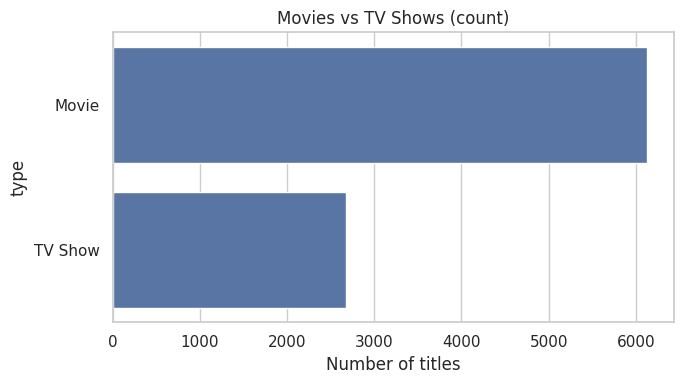

In [16]:
type_counts = dfw['type'].value_counts()
plt.figure(figsize=(7,4))
sns.barplot(x=type_counts.values, y=type_counts.index)
plt.title('Movies vs TV Shows (count)')
plt.xlabel('Number of titles')
plt.tight_layout()
plt.savefig('../figures/type_counts.png', dpi=150)
plt.show()